# MODELOS REDES NEURONALES CONVOLUCIONALES

In [39]:
import requests
import nltk
import pandas as pd
import time
from time import sleep, strftime
import random
from random import randint
import shutil
import pickle
import os
import nltk
import nltk.text
import nltk.corpus
from wordcloud import WordCloud, STOPWORDS
from time import sleep, strftime
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
from numpy import array
from tensorflow import keras
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D, AveragePooling1D
from nltk.tokenize import word_tokenize    
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.metrics import Recall
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model


In [41]:
from numpy import array
from numpy import asarray
from numpy import zeros

# **Red neuronal convolucional. Reviews todos los datos**

Cogemos de nuestro dataframe todas las reviews de medios especializados para analizar la clasificación de las etiquetas de reviews "positivas", "mixtas" y "negativas".

In [42]:
df=pd.read_pickle('../input/df-prueba2/proyecto_df_protocolo.pkl')

In [43]:
df

,index,Titulo,Plataforma,Fecha_salida,Resumen,Desarrolladora,Genero,Rating,Metascore,Puntuacion_usuarios,...,Rail,Arcade,Puzzle,Puntuaciones_criticos,Medios,Fecha_review,Reviews,etiqueta,reviews_clean,target
0,0,Red Dead Redemption 2,PlayStation 4,"Oct 26, 2018",Developed by the creators of Grand Theft Auto ...,Rockstar Games,"[Action Adventure, Open-World]",M,97.0,8.4,...,0.0,0.0,0.0,100.0,LEVEL (Czech Republic),"Dec 31, 2018",Amazing not only for Western lovers. No other ...,positiva,"[amazing, western, lover, game, probably, offe...",0
1,0,Red Dead Redemption 2,PlayStation 4,"Oct 26, 2018",Developed by the creators of Grand Theft Auto ...,Rockstar Games,"[Action Adventure, Open-World]",M,97.0,8.4,...,0.0,0.0,0.0,100.0,Game Rant,"Nov 17, 2018",It’s simply incredible how much Rockstar has a...,positiva,"[simply, incredible, much, rockstar, accounted...",0
2,0,Red Dead Redemption 2,PlayStation 4,"Oct 26, 2018",Developed by the creators of Grand Theft Auto ...,Rockstar Games,"[Action Adventure, Open-World]",M,97.0,8.4,...,0.0,0.0,0.0,100.0,Playstation Official Magazine UK,"Nov 14, 2018",No open world game makes you feel as physicall...,positiva,"[open, world, game, make, feel, physically, pr...",0
3,0,Red Dead Redemption 2,PlayStation 4,"Oct 26, 2018",Developed by the creators of Grand Theft Auto ...,Rockstar Games,"[Action Adventure, Open-World]",M,97.0,8.4,...,0.0,0.0,0.0,100.0,Edge Magazine,"Nov 8, 2018","It's a game of restraint, but with some brutal...",positiva,"[game, restraint, brutal, sucker, punch, tale,...",0
4,0,Red Dead Redemption 2,PlayStation 4,"Oct 26, 2018",Developed by the creators of Grand Theft Auto ...,Rockstar Games,"[Action Adventure, Open-World]",M,97.0,8.4,...,0.0,0.0,0.0,100.0,Games.cz,"Nov 5, 2018","Unprecedented. A big, flawless game with a gre...",positiva,"[unprecedented, big, flawless, game, great, st...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83416,3635,Vroom in the Night Sky,Switch,"Apr 5, 2017",Vroom in the night sky is a magical bike actio...,Poisoft,"[Sports, Individual, Biking]",E,17.0,3.2,...,0.0,0.0,0.0,10.0,CGMagazine,"Apr 29, 2017",The dialogue might be the most atrocious I’ve ...,negativa,"[dialogue, might, atrocious, seen, date, game,...",2
83417,3635,Vroom in the Night Sky,Switch,"Apr 5, 2017",Vroom in the night sky is a magical bike actio...,Poisoft,"[Sports, Individual, Biking]",E,17.0,3.2,...,0.0,0.0,0.0,10.0,FNintendo,"Apr 28, 2017",There is nothing positive to highlight in Vroo...,negativa,"[nothing, positive, highlight, vroom, night, s...",2
83418,3635,Vroom in the Night Sky,Switch,"Apr 5, 2017",Vroom in the night sky is a magical bike actio...,Poisoft,"[Sports, Individual, Biking]",E,17.0,3.2,...,0.0,0.0,0.0,10.0,Destructoid,"Apr 17, 2017","The lowest of the low. There is no potential, ...",negativa,"[lowest, low, potential, skill, depth, talent,...",2
83419,3635,Vroom in the Night Sky,Switch,"Apr 5, 2017",Vroom in the night sky is a magical bike actio...,Poisoft,"[Sports, Individual, Biking]",E,17.0,3.2,...,0.0,0.0,0.0,10.0,Meristation,"Mar 18, 2017",Vroom in the Night Sky is probably the worst-p...,negativa,"[vroom, night, sky, probably, worst, priced, g...",2


In [44]:
corpus= df['reviews_clean'].apply(lambda x:' '.join(x))
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(corpus)
vocab_length = len(word_tokenizer.word_index) + 1
embedded_sentences = word_tokenizer.texts_to_sequences(corpus)

word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(corpus, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
padded_sentences = pad_sequences(embedded_sentences, length_long_sentence, padding='post')

In [45]:
embeddings_dictionary = dict()
glove_file = open('../input/glovedata/glove.6B.100d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions

glove_file.close()

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [49]:
model = Sequential()
model.add(Embedding(vocab_length, 100,weights=[embedding_matrix], input_length=length_long_sentence, trainable=False))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', Recall()])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 139, 100)          3138000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 135, 128)          64128     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 67, 128)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8576)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                85770     
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

In [50]:
X=padded_sentences
y=np.asarray(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [51]:
callback = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history= model.fit(X_train, y_train, validation_split=0.3, epochs=70, verbose=1, callbacks=callback)
scores = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1])) 

Epoch 1/70
1460/1460 [==============================] - 8s 5ms/step - loss: 0.5333 - acc: 0.6025 - recall_4: 0.3652 - val_loss: 0.4949 - val_acc: 0.6073 - val_recall_4: 0.6017
Epoch 2/70
1460/1460 [==============================] - 7s 5ms/step - loss: 0.4926 - acc: 0.6076 - recall_4: 0.6055 - val_loss: 0.4718 - val_acc: 0.6068 - val_recall_4: 0.6050
Epoch 3/70
1460/1460 [==============================] - 8s 6ms/step - loss: 0.4846 - acc: 0.6141 - recall_4: 0.6052 - val_loss: 0.4655 - val_acc: 0.6146 - val_recall_4: 0.6001
Epoch 4/70
1460/1460 [==============================] - 8s 5ms/step - loss: 0.4801 - acc: 0.6214 - recall_4: 0.6117 - val_loss: 0.4575 - val_acc: 0.6245 - val_recall_4: 0.6049
Epoch 5/70
1460/1460 [==============================] - 7s 5ms/step - loss: 0.4714 - acc: 0.6275 - recall_4: 0.6158 - val_loss: 0.4510 - val_acc: 0.6241 - val_recall_4: 0.6087
Epoch 6/70
1460/1460 [==============================] - 8s 6ms/step - loss: 0.4654 - acc: 0.6327 - recall_4: 0.6189 - va

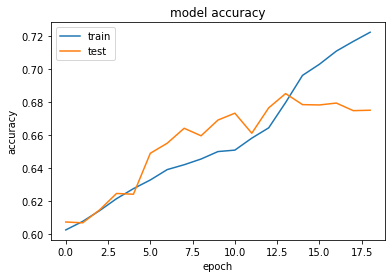

In [52]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Obtenemos un accuracciý y un recall elevados pero procederemos a ver si podemos mejorar los resultados.

# **Red neuronal convolucional. Reviews dos etiquetas**

Debido a que los resultados con todos los datos no parecen arrojar buenos resultados se procede a establecer dos etiquetas, omitiendo la etiqueta mixta. El dataframe es el mismo solo que con las etiquetas de comentarios positivas y negativas

In [53]:
df=pd.read_pickle('../input/df6-prueba/proyecto_df6_protocolo.pkl')

In [54]:
corpus= df['reviews_clean'].apply(lambda x:' '.join(x))
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(corpus)
vocab_length = len(word_tokenizer.word_index) + 1
embedded_sentences = word_tokenizer.texts_to_sequences(corpus)

word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(corpus, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
padded_sentences = pad_sequences(embedded_sentences, length_long_sentence, padding='post')

In [55]:
embeddings_dictionary = dict()
glove_file = open('../input/glovedata/glove.6B.100d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions

glove_file.close()

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [56]:
model = Sequential()
model.add(Embedding(vocab_length, 100,weights=[embedding_matrix], input_length=length_long_sentence, trainable=False))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', Recall()])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 98, 100)           1473400   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 94, 128)           64128     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 47, 128)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6016)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               601700    
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [57]:
X=padded_sentences
y=np.asarray(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [58]:
callback = EarlyStopping(monitor='val_loss', verbose=1)
history= model.fit(X_train, y_train, validation_split=0.3, epochs=70, verbose=1, callbacks=callback)
scores = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1])) 

Epoch 1/70
114/114 [==============================] - 1s 7ms/step - loss: 0.7195 - acc: 0.5603 - recall_5: 0.1109 - val_loss: 0.6777 - val_acc: 0.5623 - val_recall_5: 0.0000e+00
Epoch 2/70
114/114 [==============================] - 1s 5ms/step - loss: 0.6476 - acc: 0.6010 - recall_5: 0.1553 - val_loss: 0.5737 - val_acc: 0.7099 - val_recall_5: 0.4883
Epoch 3/70
114/114 [==============================] - 1s 5ms/step - loss: 0.5566 - acc: 0.7084 - recall_5: 0.5199 - val_loss: 0.5051 - val_acc: 0.7696 - val_recall_5: 0.8372
Epoch 4/70
114/114 [==============================] - 1s 5ms/step - loss: 0.4883 - acc: 0.7646 - recall_5: 0.6419 - val_loss: 0.4639 - val_acc: 0.7811 - val_recall_5: 0.8021
Epoch 5/70
114/114 [==============================] - 1s 5ms/step - loss: 0.4243 - acc: 0.8073 - recall_5: 0.7045 - val_loss: 0.4999 - val_acc: 0.7612 - val_recall_5: 0.5469
Epoch 6/70
114/114 [==============================] - 1s 5ms/step - loss: 0.3693 - acc: 0.8376 - recall_5: 0.7449 - val_loss: 

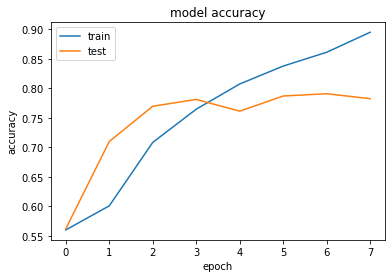

In [59]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# **Red neuronal convolucional. Comentarios todos los datos**

Actuamos de manera similar pero sobre los comentarios de usuarios en vez de las reviews de medios especilizados. 

In [60]:
df_comentarios=pd.read_pickle('../input/comentarios-usuarios/proyecto_df5_usuarios_protocolo.pkl')
df_pn=pd.read_pickle('../input/comentarios-usuarios/proyecto_df6_usuarios_protocolo.pkl')

In [61]:
df_pn.target=df_pn.target.replace(2,1)

In [62]:
corpus= df_comentarios['reviews_usuarios_clean'].apply(lambda x:' '.join(x))
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(corpus)
vocab_length = len(word_tokenizer.word_index)+1
embedded_sentences = word_tokenizer.texts_to_sequences(corpus)

word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(corpus, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
padded_sentences = pad_sequences(embedded_sentences, length_long_sentence, padding='post')

In [63]:
embeddings_dictionary = dict()
glove_file = open('../input/glovedata/glove.6B.100d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions

glove_file.close()

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [64]:
X=padded_sentences
y=np.asarray(df_comentarios['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [65]:
model = Sequential()
model.add(Embedding(vocab_length, 100,weights=[embedding_matrix], input_length=length_long_sentence, trainable=False))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', Recall()])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 1299, 100)         5810200   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 1295, 128)         64128     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 647, 128)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 82816)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               8281700   
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 3)                

In [66]:
callback = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history= model.fit(X_train, y_train, validation_split=0.3, epochs=70, verbose=1, callbacks=callback)
scores = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1])) 

Epoch 1/70
1231/1231 [==============================] - 17s 14ms/step - loss: 0.5472 - acc: 0.5227 - recall_6: 0.2820 - val_loss: 0.4676 - val_acc: 0.6394 - val_recall_6: 0.3973
Epoch 2/70
1231/1231 [==============================] - 18s 14ms/step - loss: 0.4897 - acc: 0.6020 - recall_6: 0.3995 - val_loss: 0.4455 - val_acc: 0.6605 - val_recall_6: 0.4581
Epoch 3/70
1231/1231 [==============================] - 18s 14ms/step - loss: 0.4678 - acc: 0.6330 - recall_6: 0.4380 - val_loss: 0.4339 - val_acc: 0.6803 - val_recall_6: 0.4960
Epoch 4/70
1231/1231 [==============================] - 17s 14ms/step - loss: 0.4560 - acc: 0.6395 - recall_6: 0.4537 - val_loss: 0.4290 - val_acc: 0.6823 - val_recall_6: 0.4859
Epoch 5/70
1231/1231 [==============================] - 17s 14ms/step - loss: 0.4452 - acc: 0.6581 - recall_6: 0.4692 - val_loss: 0.4279 - val_acc: 0.6896 - val_recall_6: 0.5161
Epoch 6/70
1231/1231 [==============================] - 18s 15ms/step - loss: 0.4351 - acc: 0.6708 - recall_6:

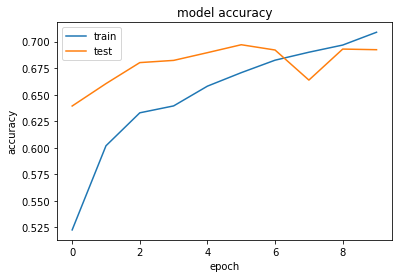

In [67]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Obtenemos resultados parecidos a que con los medios especilizados.

# **Red neuronal convolucional. Comentarios dos etiquetas**

Al igual que con los medios especializados, cogemos solo de los comentarios de usuarios aquellos que tengan la etiqueta "positiva" y la etiqueta "negativa", omitiendo la etiqueta "mixta"

In [80]:
corpus= df_pn['reviews_usuarios_clean'].apply(lambda x:' '.join(x))
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(corpus)
vocab_length = len(word_tokenizer.word_index)+1
embedded_sentences = word_tokenizer.texts_to_sequences(corpus)

word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(corpus, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
padded_sentences = pad_sequences(embedded_sentences, length_long_sentence, padding='post')

In [81]:
embeddings_dictionary = dict()
glove_file = open('../input/glovedata/glove.6B.100d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions

glove_file.close()

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [82]:
X=padded_sentences
y=np.asarray(df_pn['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [85]:
model = Sequential()
model.add(Embedding(vocab_length, 100,weights=[embedding_matrix], input_length=length_long_sentence, trainable=False))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', Recall()])
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 1299, 100)         4774000   
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 1295, 128)         64128     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 647, 128)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 82816)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               8281700   
_________________________________________________________________
dropout_11 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)               

In [86]:
callback = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history= model.fit(X_train, y_train, validation_split=0.3, epochs=70, verbose=1, callbacks=callback)
scores = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1])) 

Epoch 1/70
687/687 [==============================] - 10s 14ms/step - loss: 0.5082 - acc: 0.7448 - recall_11: 0.9127 - val_loss: 0.3512 - val_acc: 0.8504 - val_recall_11: 0.9246
Epoch 2/70
687/687 [==============================] - 9s 13ms/step - loss: 0.3643 - acc: 0.8541 - recall_11: 0.8930 - val_loss: 0.3061 - val_acc: 0.8727 - val_recall_11: 0.9363
Epoch 3/70
687/687 [==============================] - 9s 13ms/step - loss: 0.3330 - acc: 0.8704 - recall_11: 0.9052 - val_loss: 0.2866 - val_acc: 0.8821 - val_recall_11: 0.9108
Epoch 4/70
687/687 [==============================] - 9s 13ms/step - loss: 0.2976 - acc: 0.8809 - recall_11: 0.9119 - val_loss: 0.2977 - val_acc: 0.8773 - val_recall_11: 0.9409
Epoch 5/70
687/687 [==============================] - 9s 13ms/step - loss: 0.2748 - acc: 0.8929 - recall_11: 0.9156 - val_loss: 0.3022 - val_acc: 0.8816 - val_recall_11: 0.9422
Epoch 00005: early stopping
655/655 [==============================] - 5s 8ms/step - loss: 0.3056 - acc: 0.8803 - 

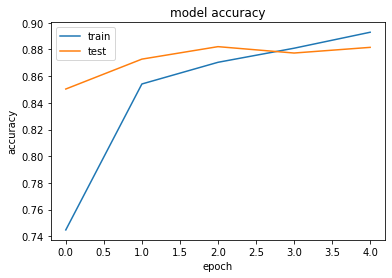

In [87]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Como conclusión se obtienen unos valores de precisión bastante elevados y con un buen recall lo que nos indica la seguridad del algoritmo para poder detectar comentarios negativos. Se produce algo de overfitting que debería ser corregido y tratar de mejorar el algoritmo para identificar los comentarios que se consideran "mixtos". Aun así tanto con medios especializados de análisis de videojuegos como de usuarios, es posible clasificar entre "positivos" y "negativos"